In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz


In [2]:
az.style.use("arviz-whitegrid")
plt.rc('figure', dpi=450)

In [3]:
data = np.loadtxt("https://github.com/aloctavodia/BAP3/raw/refs/heads/main/code/data/chemical_shifts.csv")

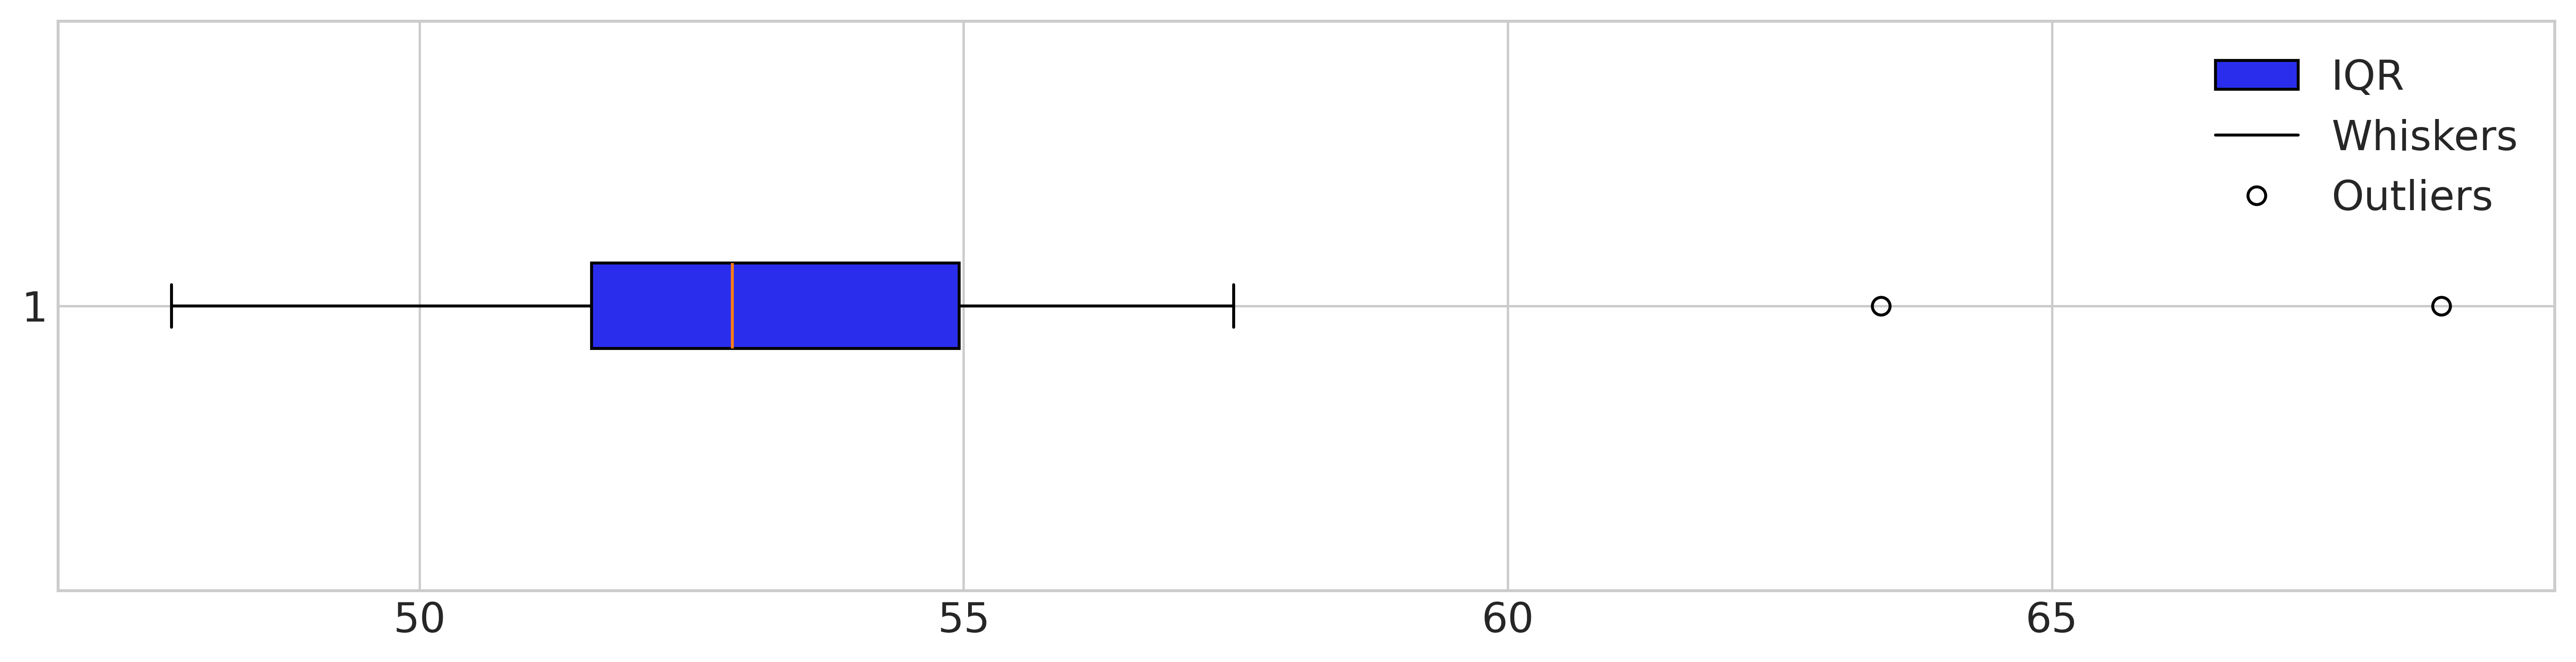

In [4]:
_, ax = plt.subplots(figsize=(12, 3))
box = ax.boxplot(data, patch_artist=True, vert=False)

# Extracting the graphic objects for the legend
median = box['medians'][0]
whiskers = box['whiskers'][0]
fliers = box['fliers'][0]
boxes = box['boxes'][0]

# Creating the legend
ax.legend([boxes, whiskers, fliers], ['IQR', 'Whiskers', 'Outliers'], loc='upper right')

plt.show()

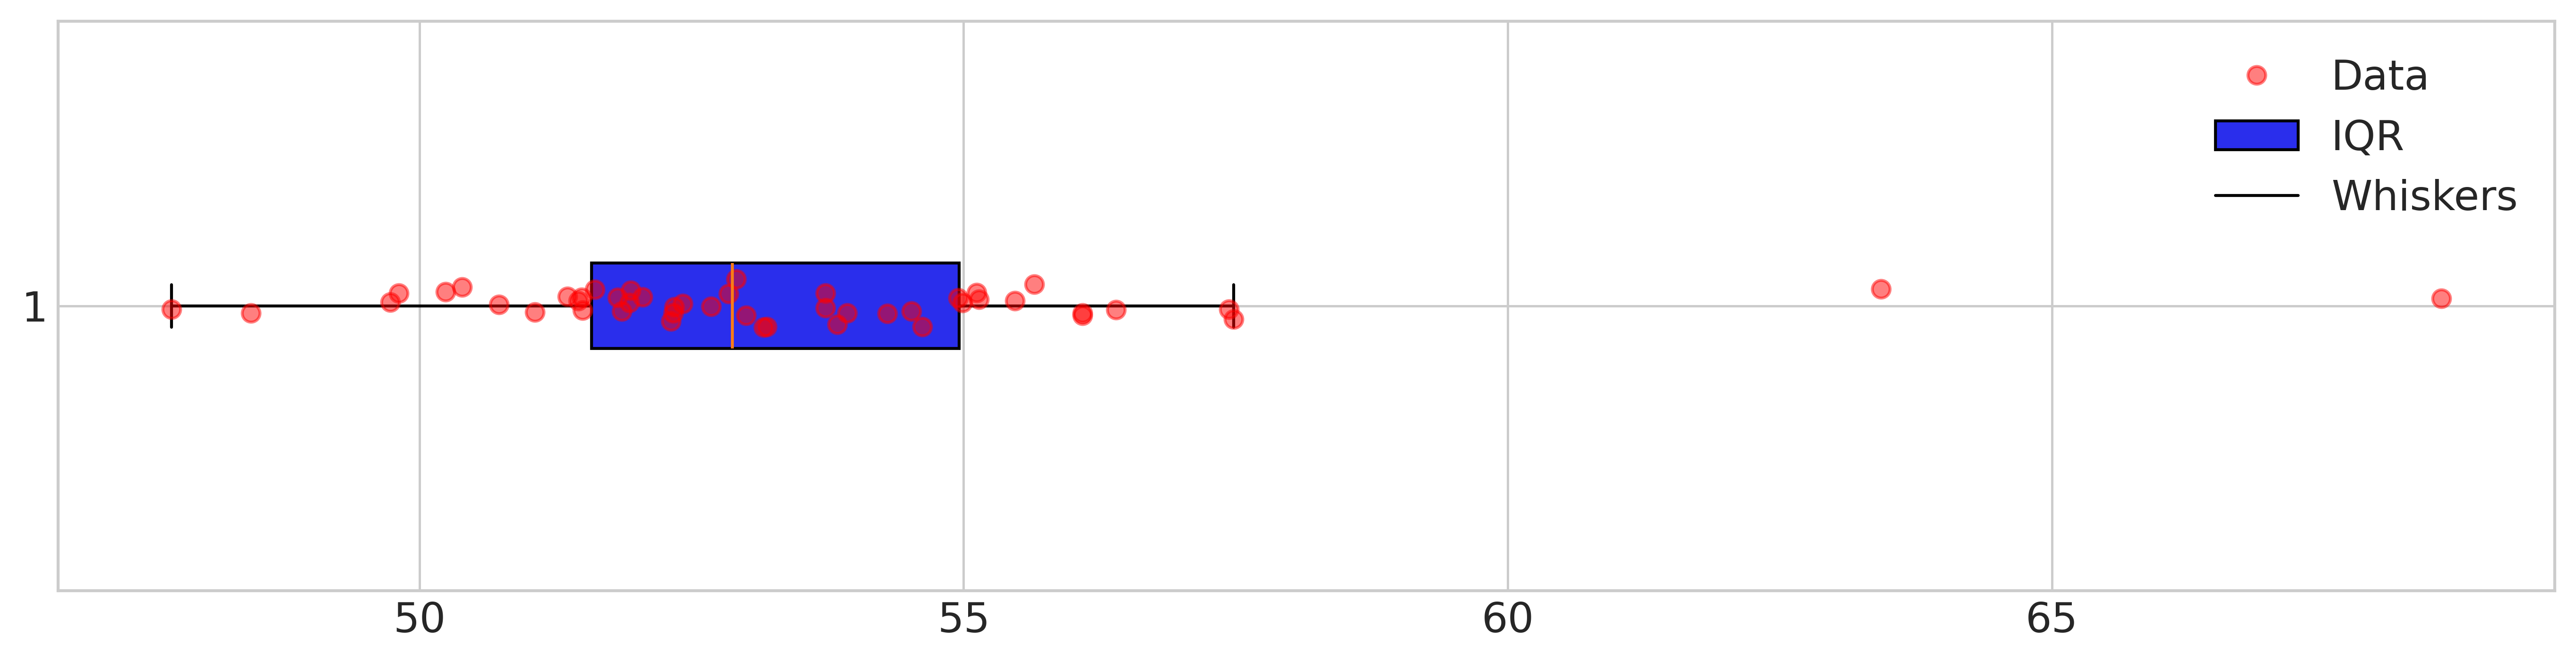

In [5]:

# Removing outliers from the boxplot
_, ax = plt.subplots(figsize=(12, 3))
box = ax.boxplot(data, patch_artist=True, vert=False, showfliers=False)

# Adding the data points with jitter on the y-axis
y = np.random.normal(1, 0.02, size=len(data))
data_points = ax.plot(data, y, 'ro', alpha=0.5, label="Data")

# Extracting the graphic objects for the legend
median = box['medians'][0]
whiskers = box['whiskers'][0]
boxes = box['boxes'][0]

# Creating the legend
ax.legend([data_points[0], boxes, whiskers], ['Data', 'IQR', 'Whiskers'], loc='upper right')



plt.show()


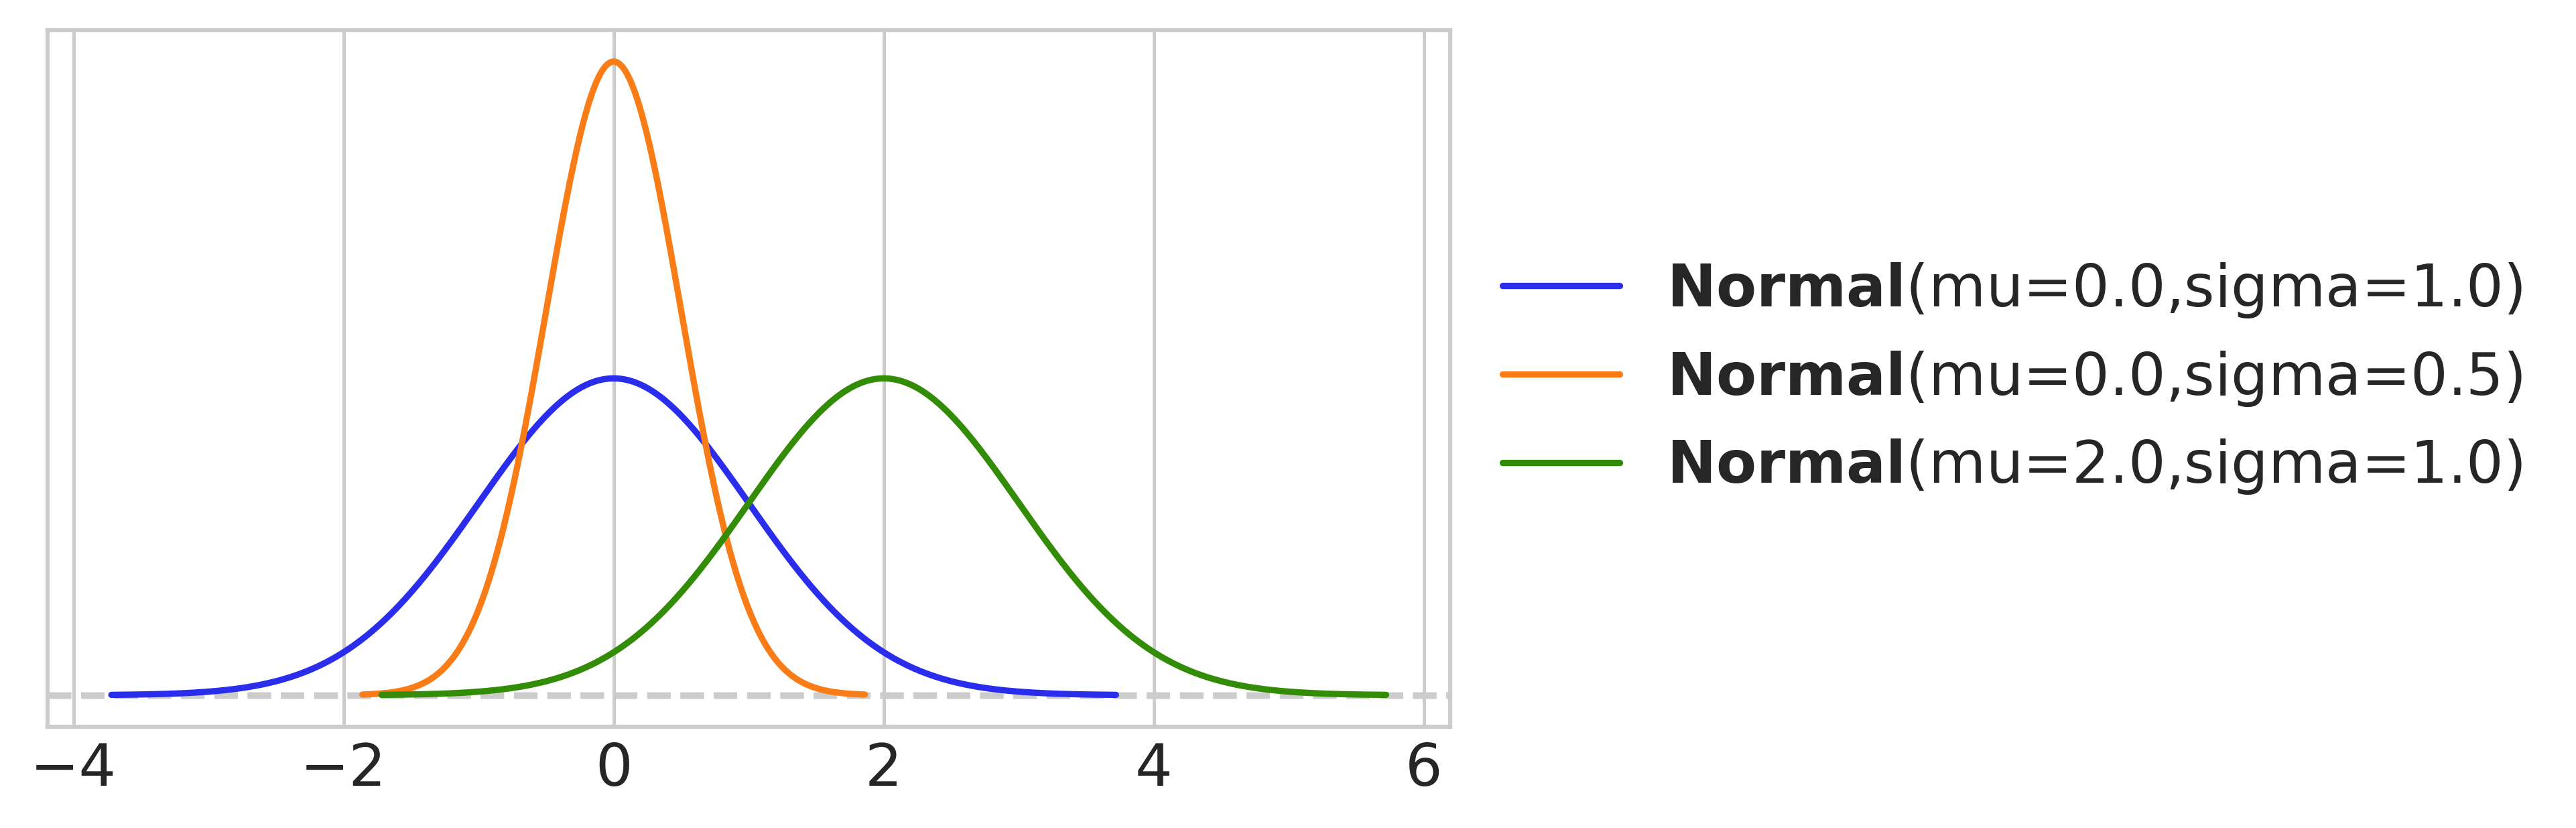

In [6]:
mu = [0, 0, 2]
sigma = [1, 0.5, 1]
_, ax = plt.subplots(figsize=(6, 3))
for i in range(3):
    normal_distribution = pz.Normal(mu=mu[i], sigma=sigma[i])
    normal_distribution.plot_pdf(ax=ax)

plt.show()

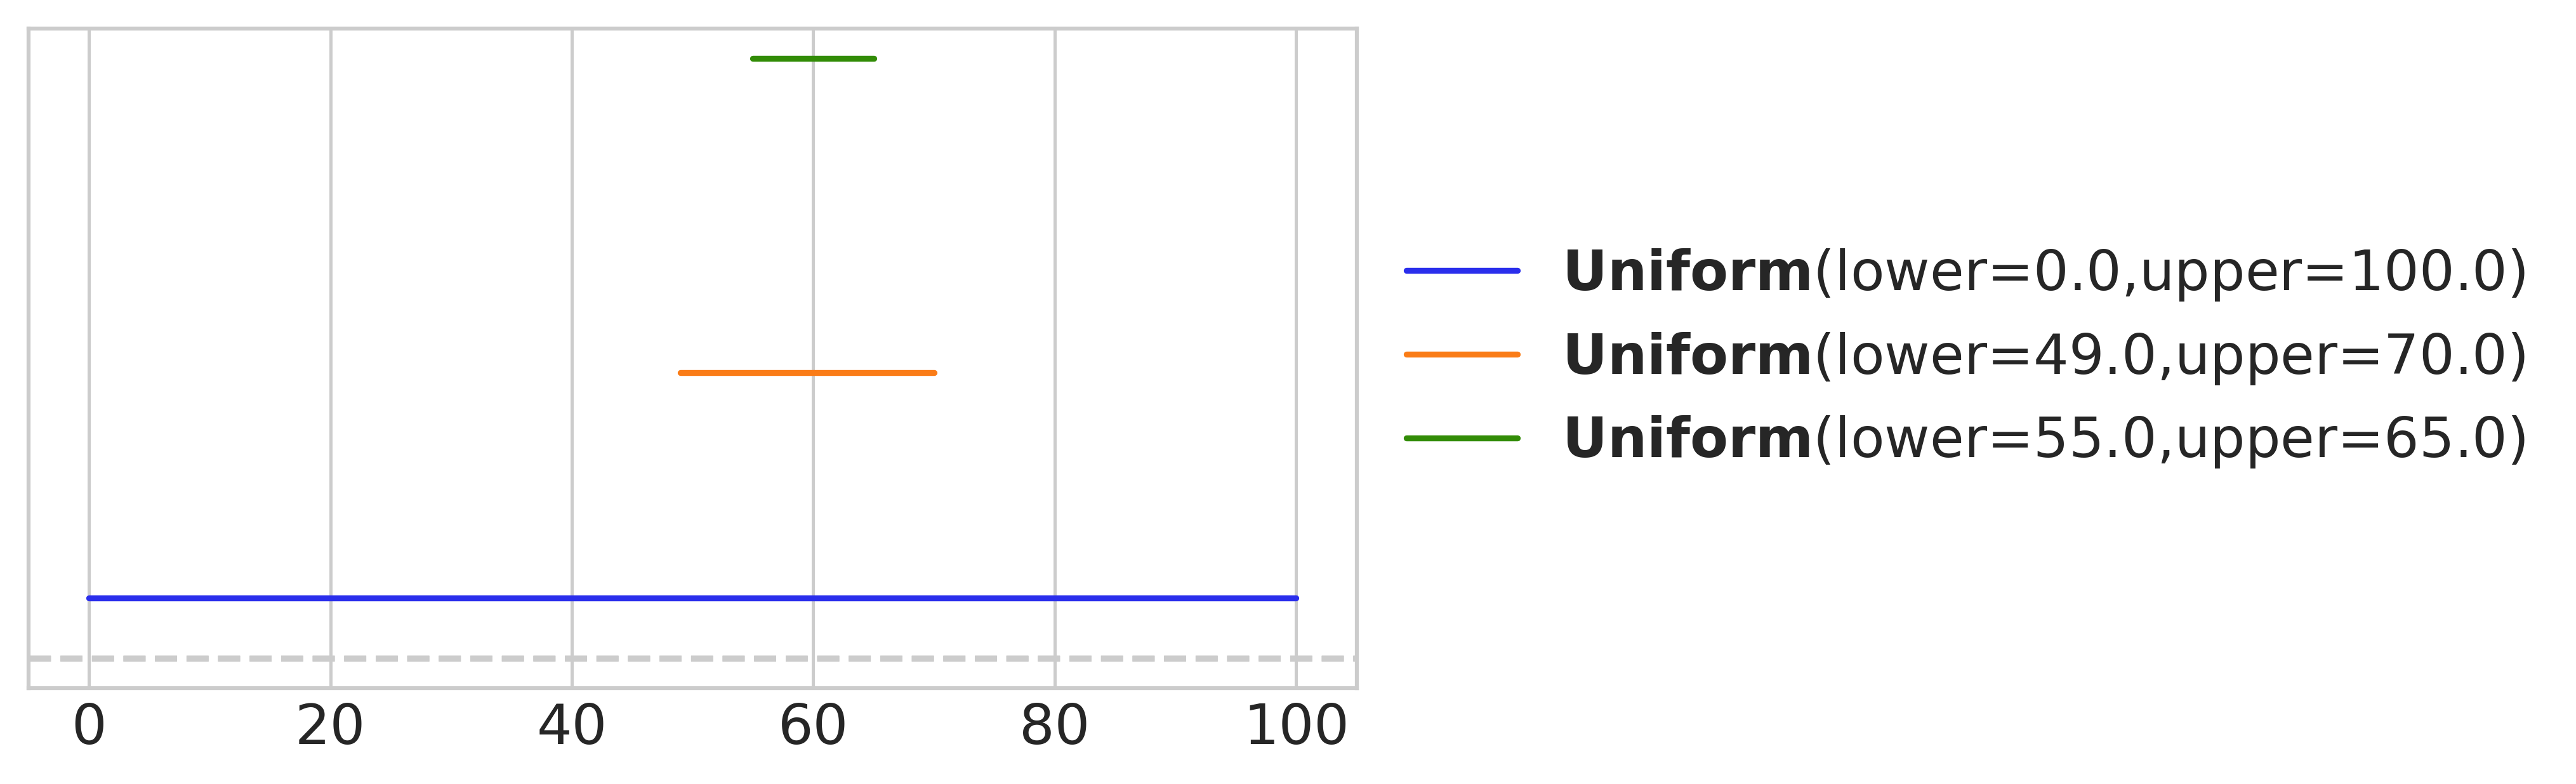

In [7]:
l = [0.0, 49.0, 55.0]
h = [100.0, 70.0, 65.0]
_, ax = plt.subplots(figsize=(6, 3))
for i in range(3):
    uniform_dist = pz.Uniform(lower=l[i], upper=h[i])
    uniform_dist.plot_pdf(ax=ax)
    
plt.show()

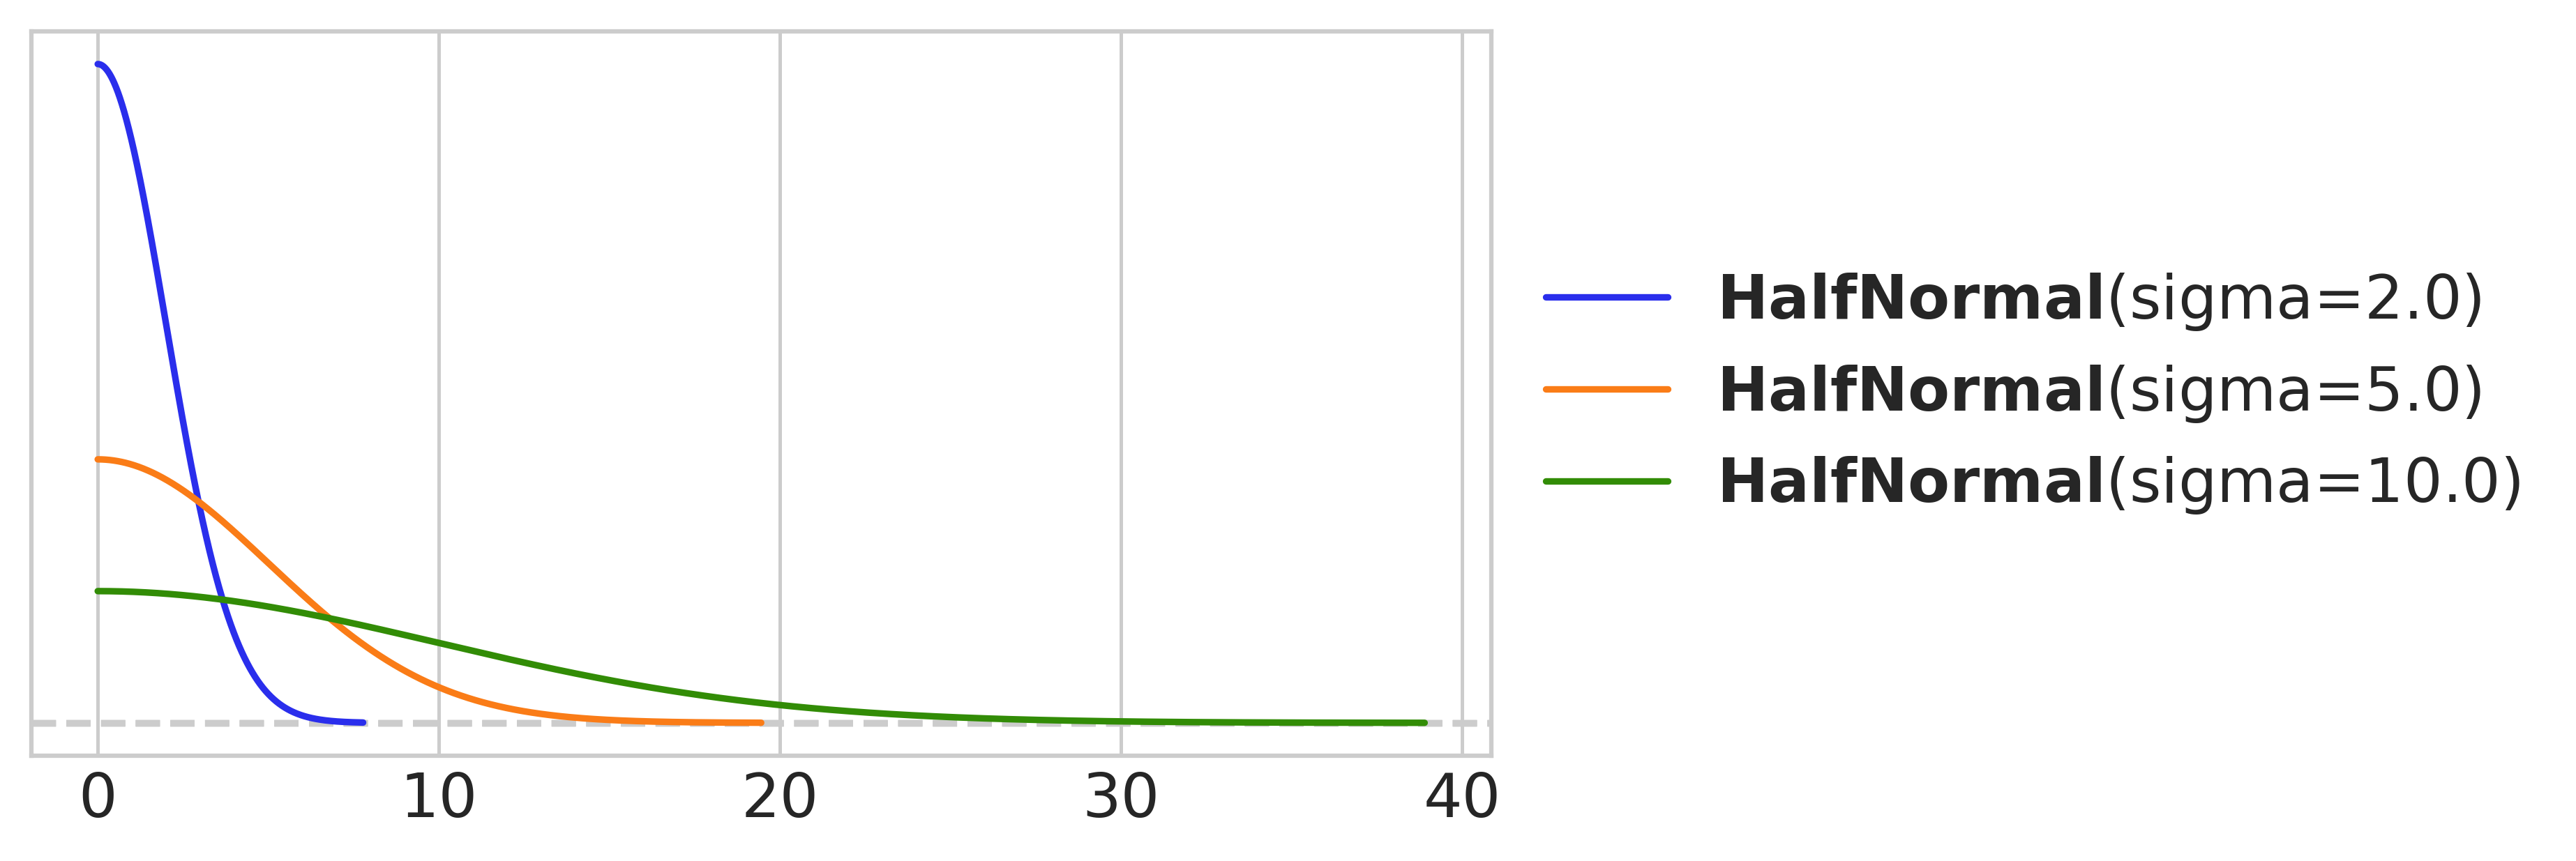

In [8]:
sigma = [2.0, 5.0, 10.0]

_, ax = plt.subplots(figsize=(6, 3))
for i in range(3):
    halfnormal_dist = pz.HalfNormal(sigma=sigma[i])
    halfnormal_dist.plot_pdf(ax=ax)
    
plt.show()

In [9]:
l_mu = 40
h_mu = 70
σ_σ = 5


In [10]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=l_mu, upper=h_mu)
    σ = pm.HalfNormal('σ', sigma=σ_σ)
    y = pm.Normal('y', mu=μ, sigma=σ, observed=data)


In [11]:
# Sample from the prior distribution
with model_g:
    idata_g = pm.sample_prior_predictive(samples=1000, random_seed=42)

Sampling: [y, μ, σ]


<Figure size 5400x2700 with 0 Axes>

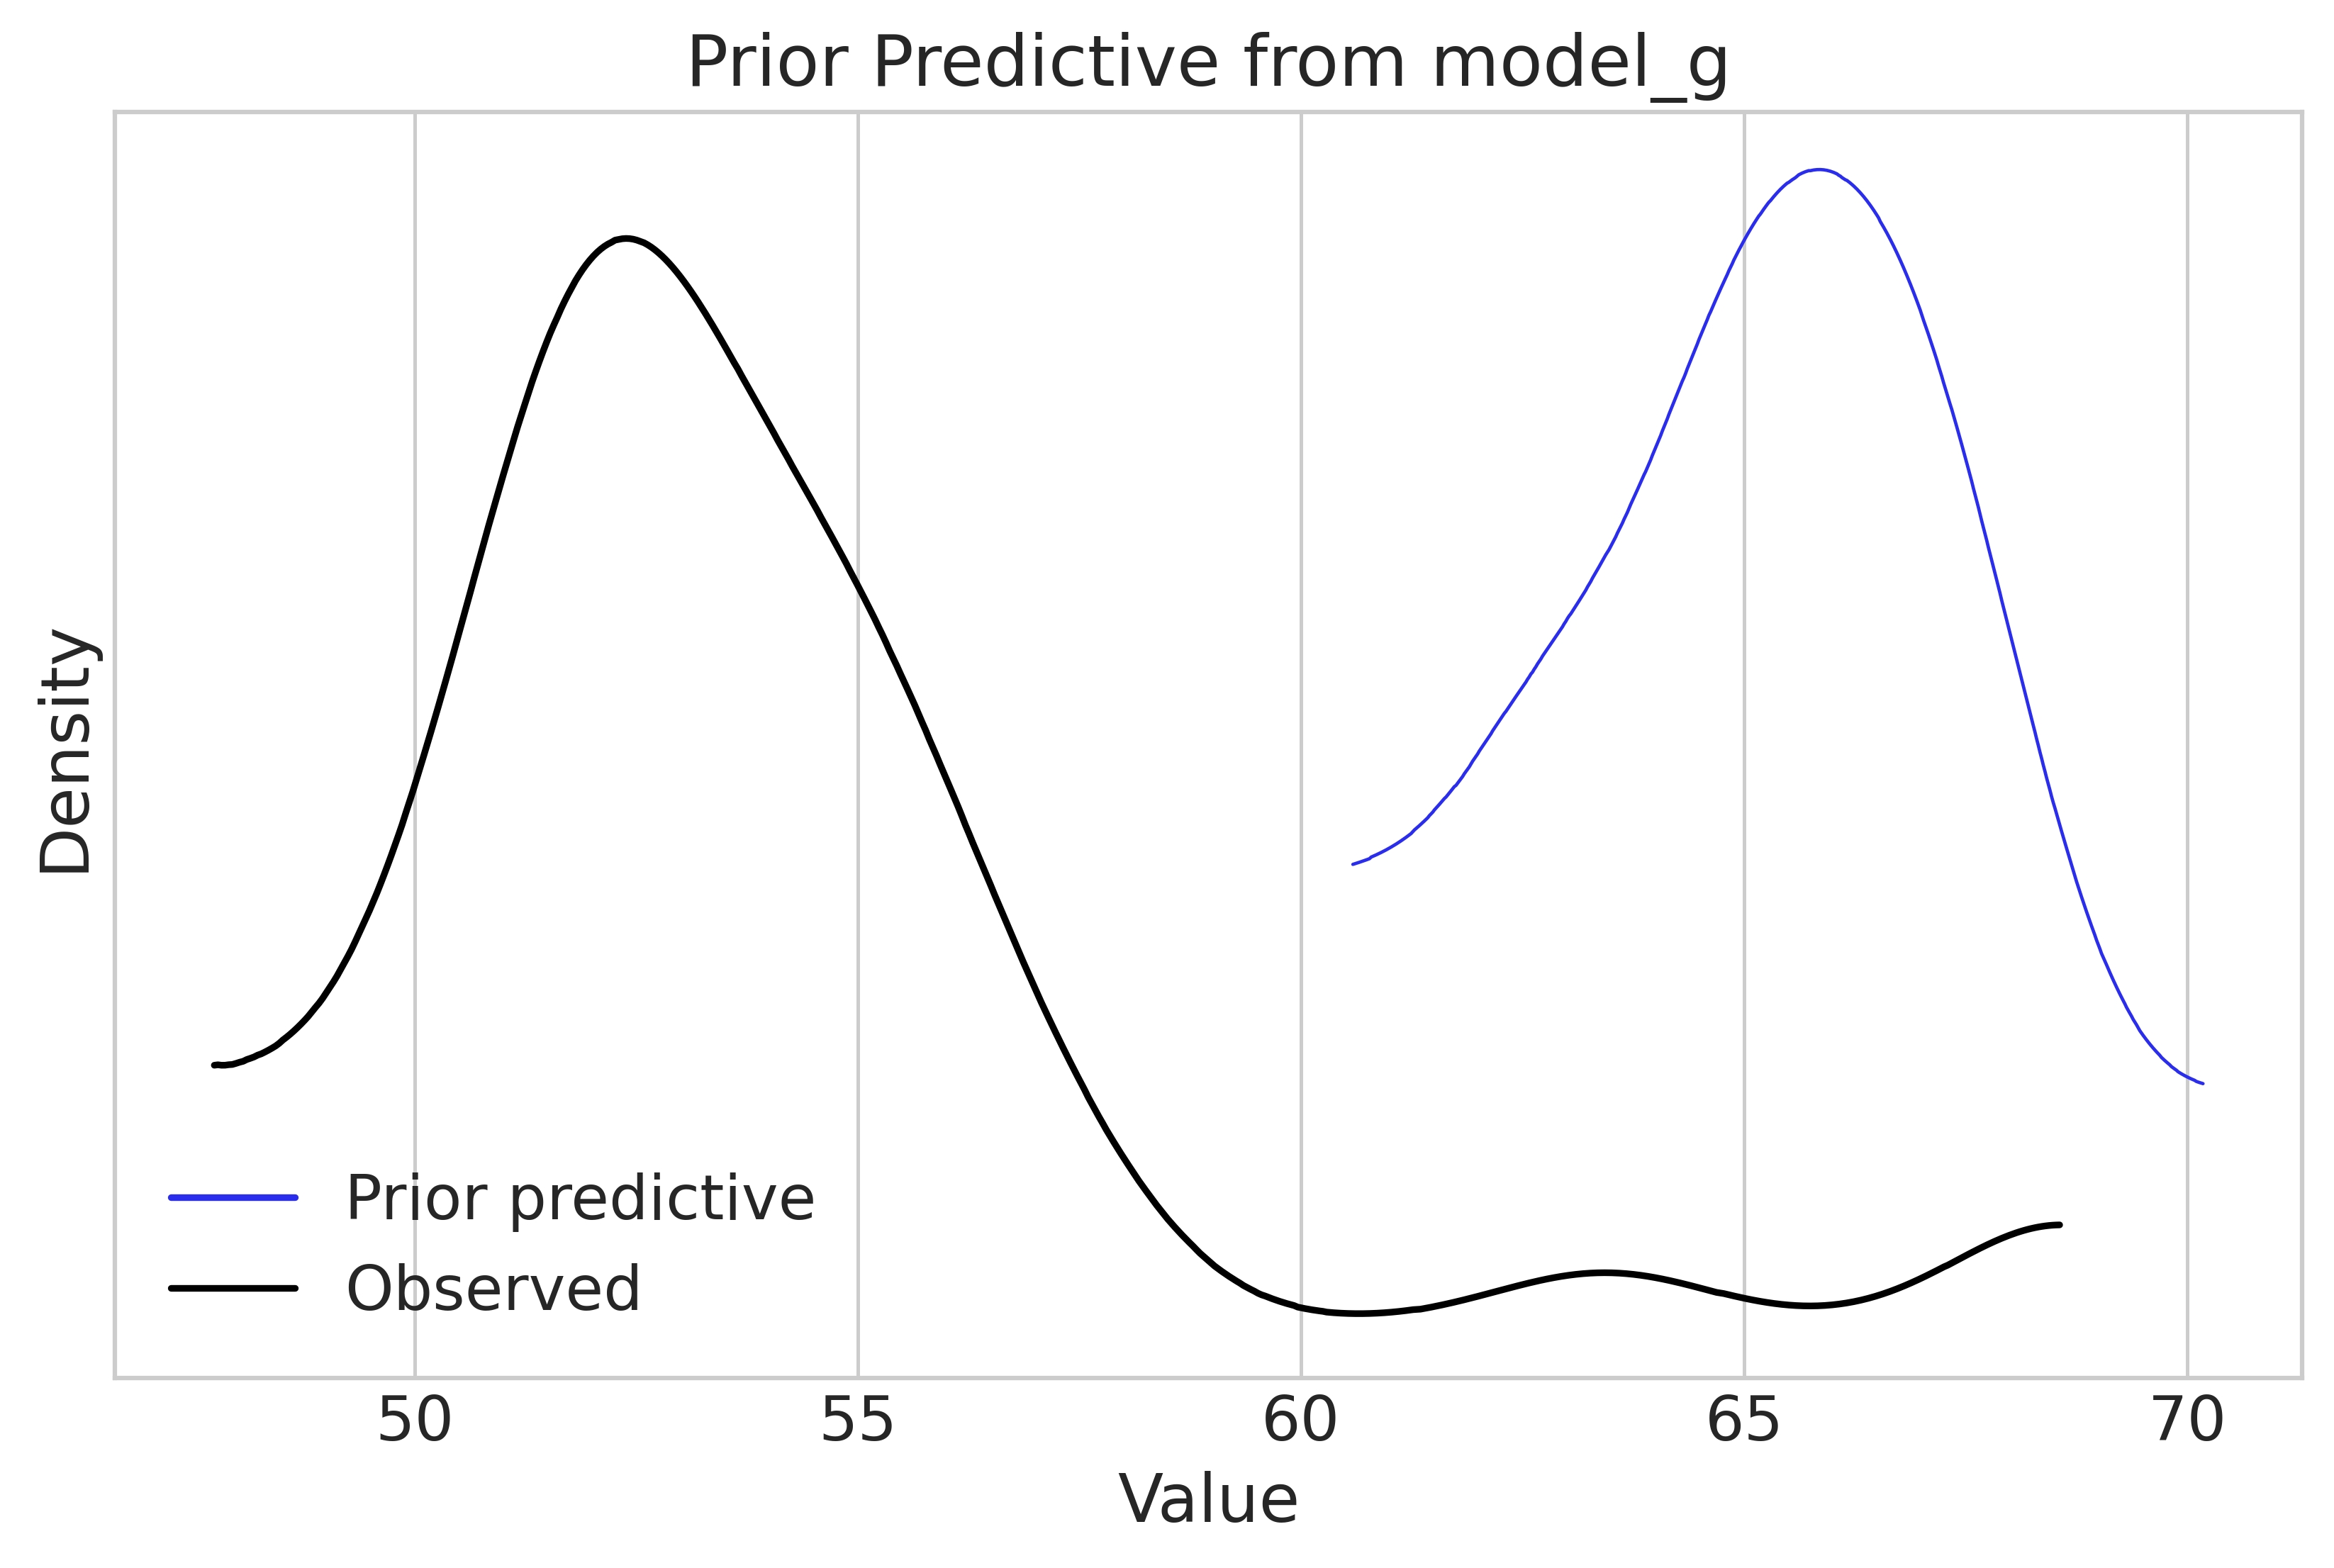

In [20]:
plt.figure(figsize=(12, 6))
ax = az.plot_ppc(idata_g, group='prior', num_pp_samples=1, mean=False, observed=True, random_seed=14)
ax.get_lines()[2].set_alpha(1.0)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Prior Predictive from model_g')

plt.legend()
plt.show()

<Figure size 4500x2700 with 0 Axes>

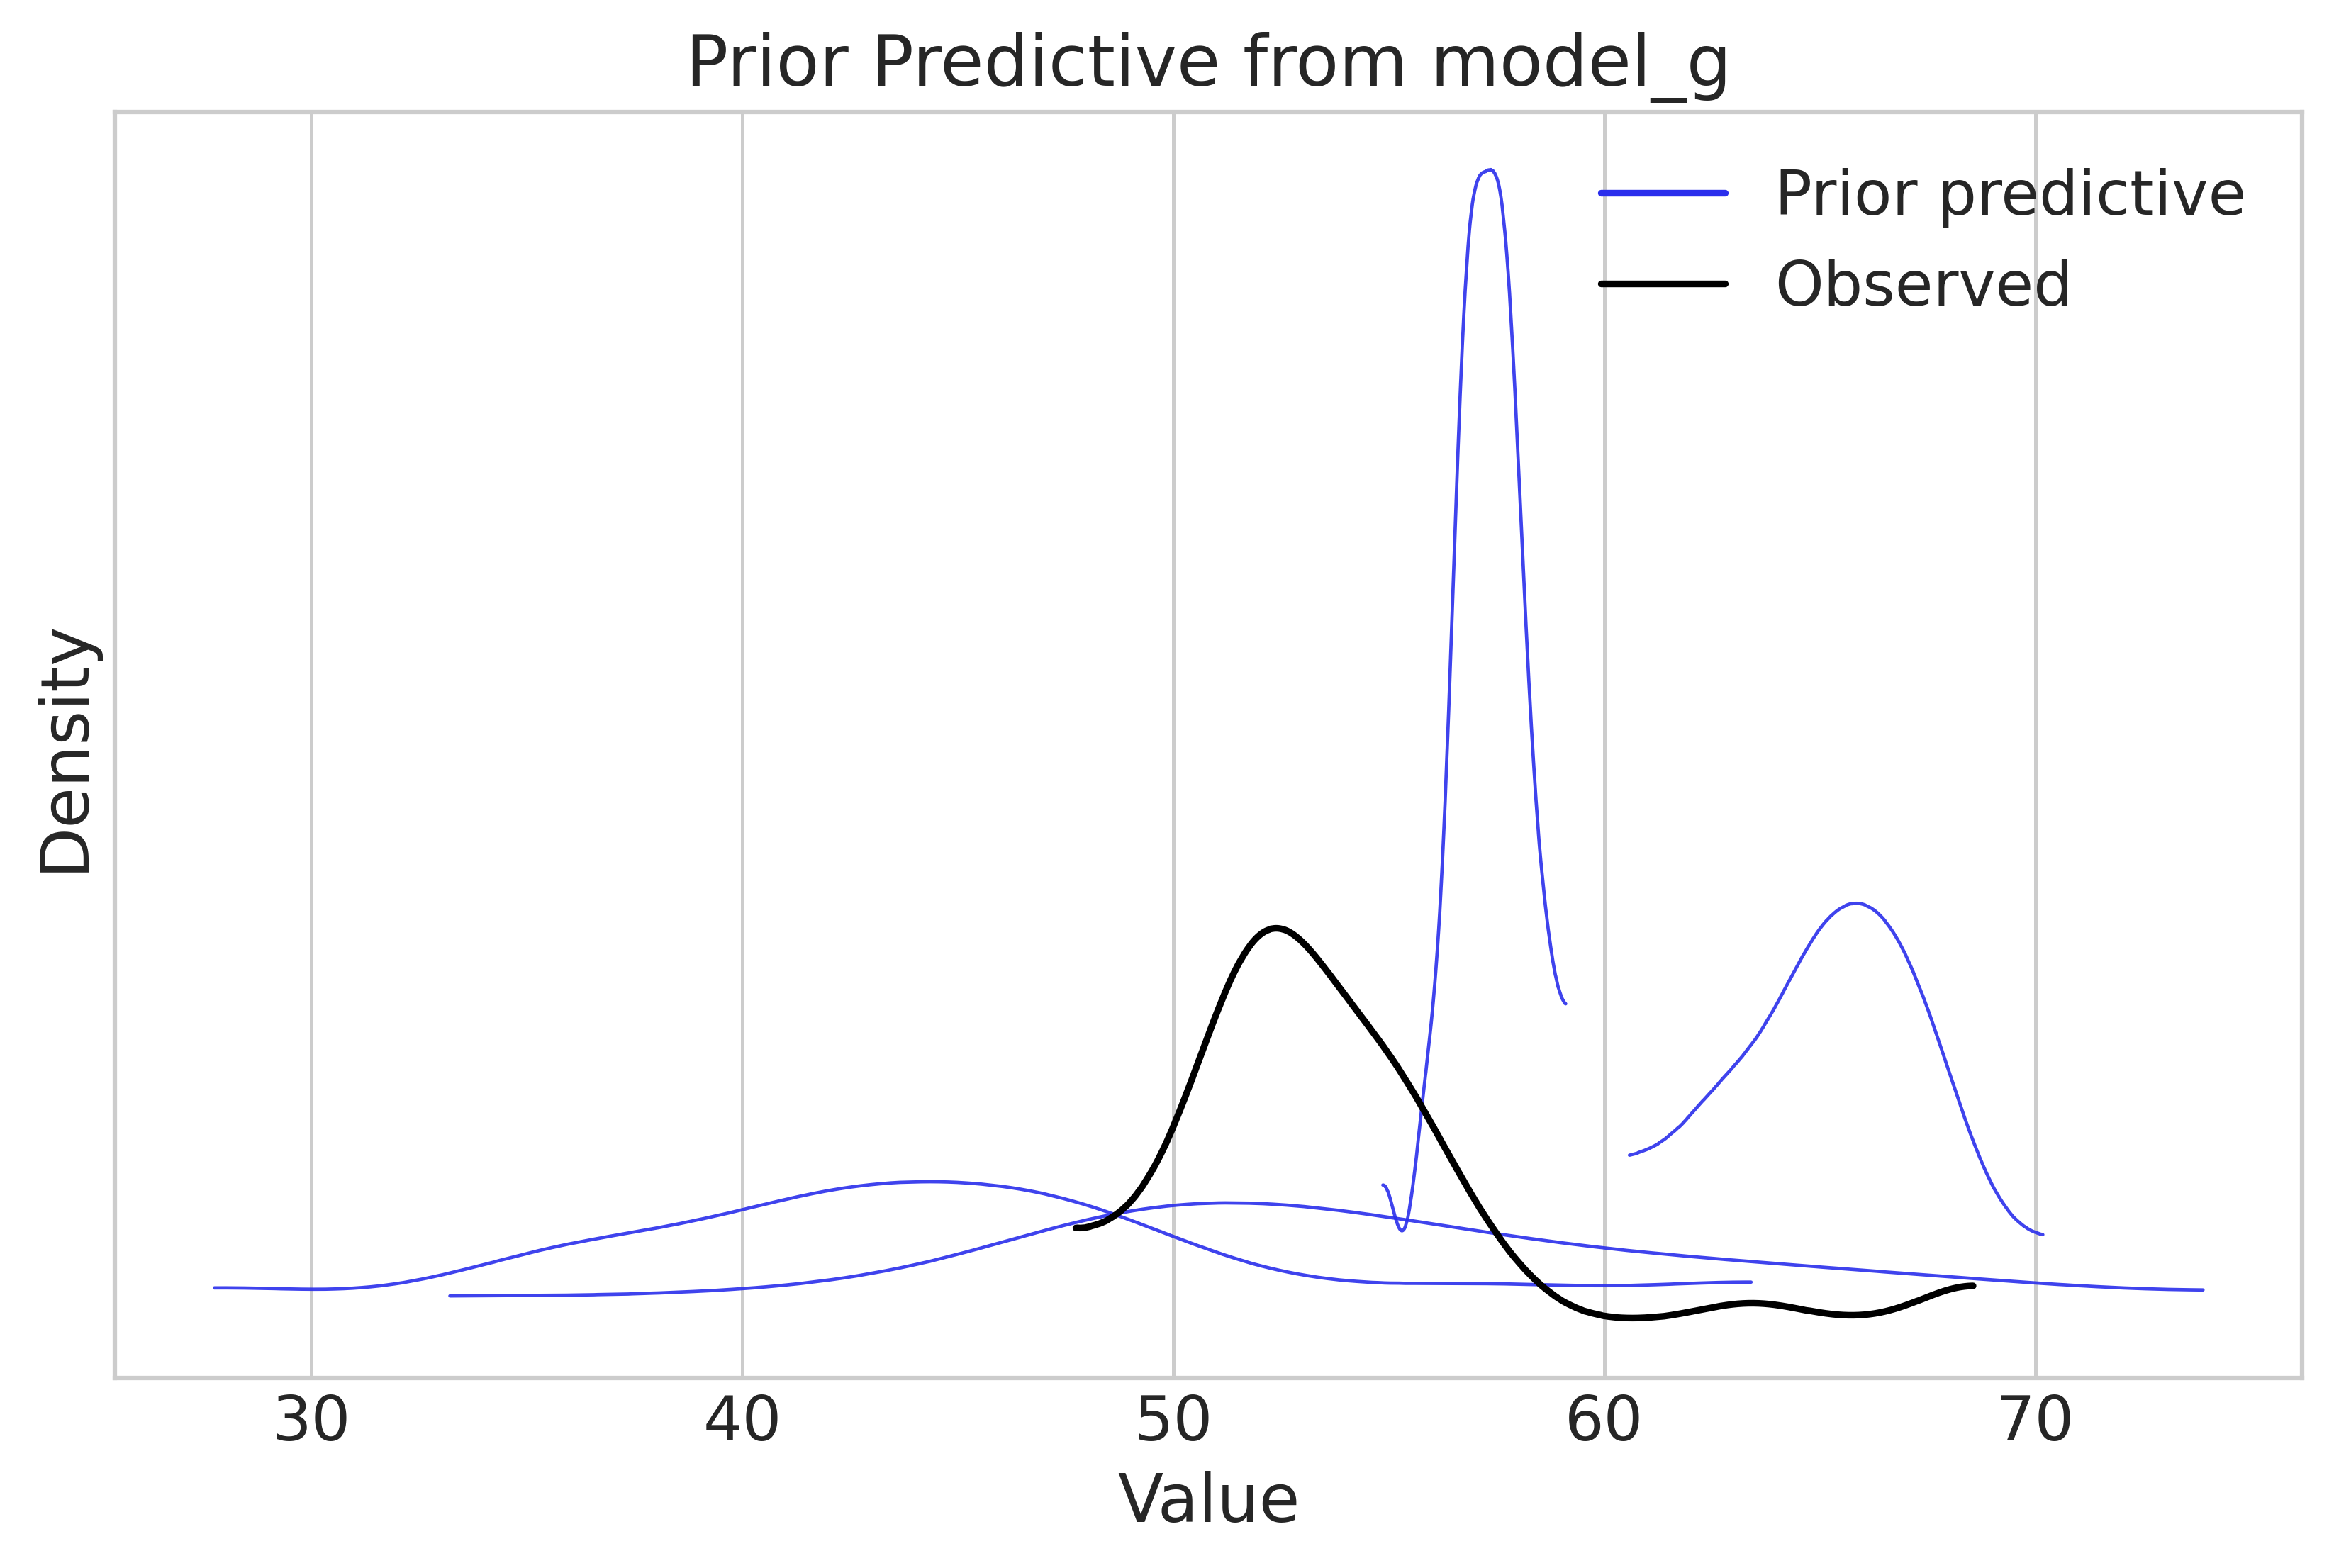

In [ ]:
plt.figure(figsize=(10, 6))
ax = az.plot_ppc(idata_g, group='prior', num_pp_samples=4, mean=False, observed=True, random_seed=14)

for l in ax.get_lines()[2:]:
    l.set_alpha(0.9)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Prior Predictive from model_g')

plt.legend()
plt.show()

<Figure size 4500x2700 with 0 Axes>

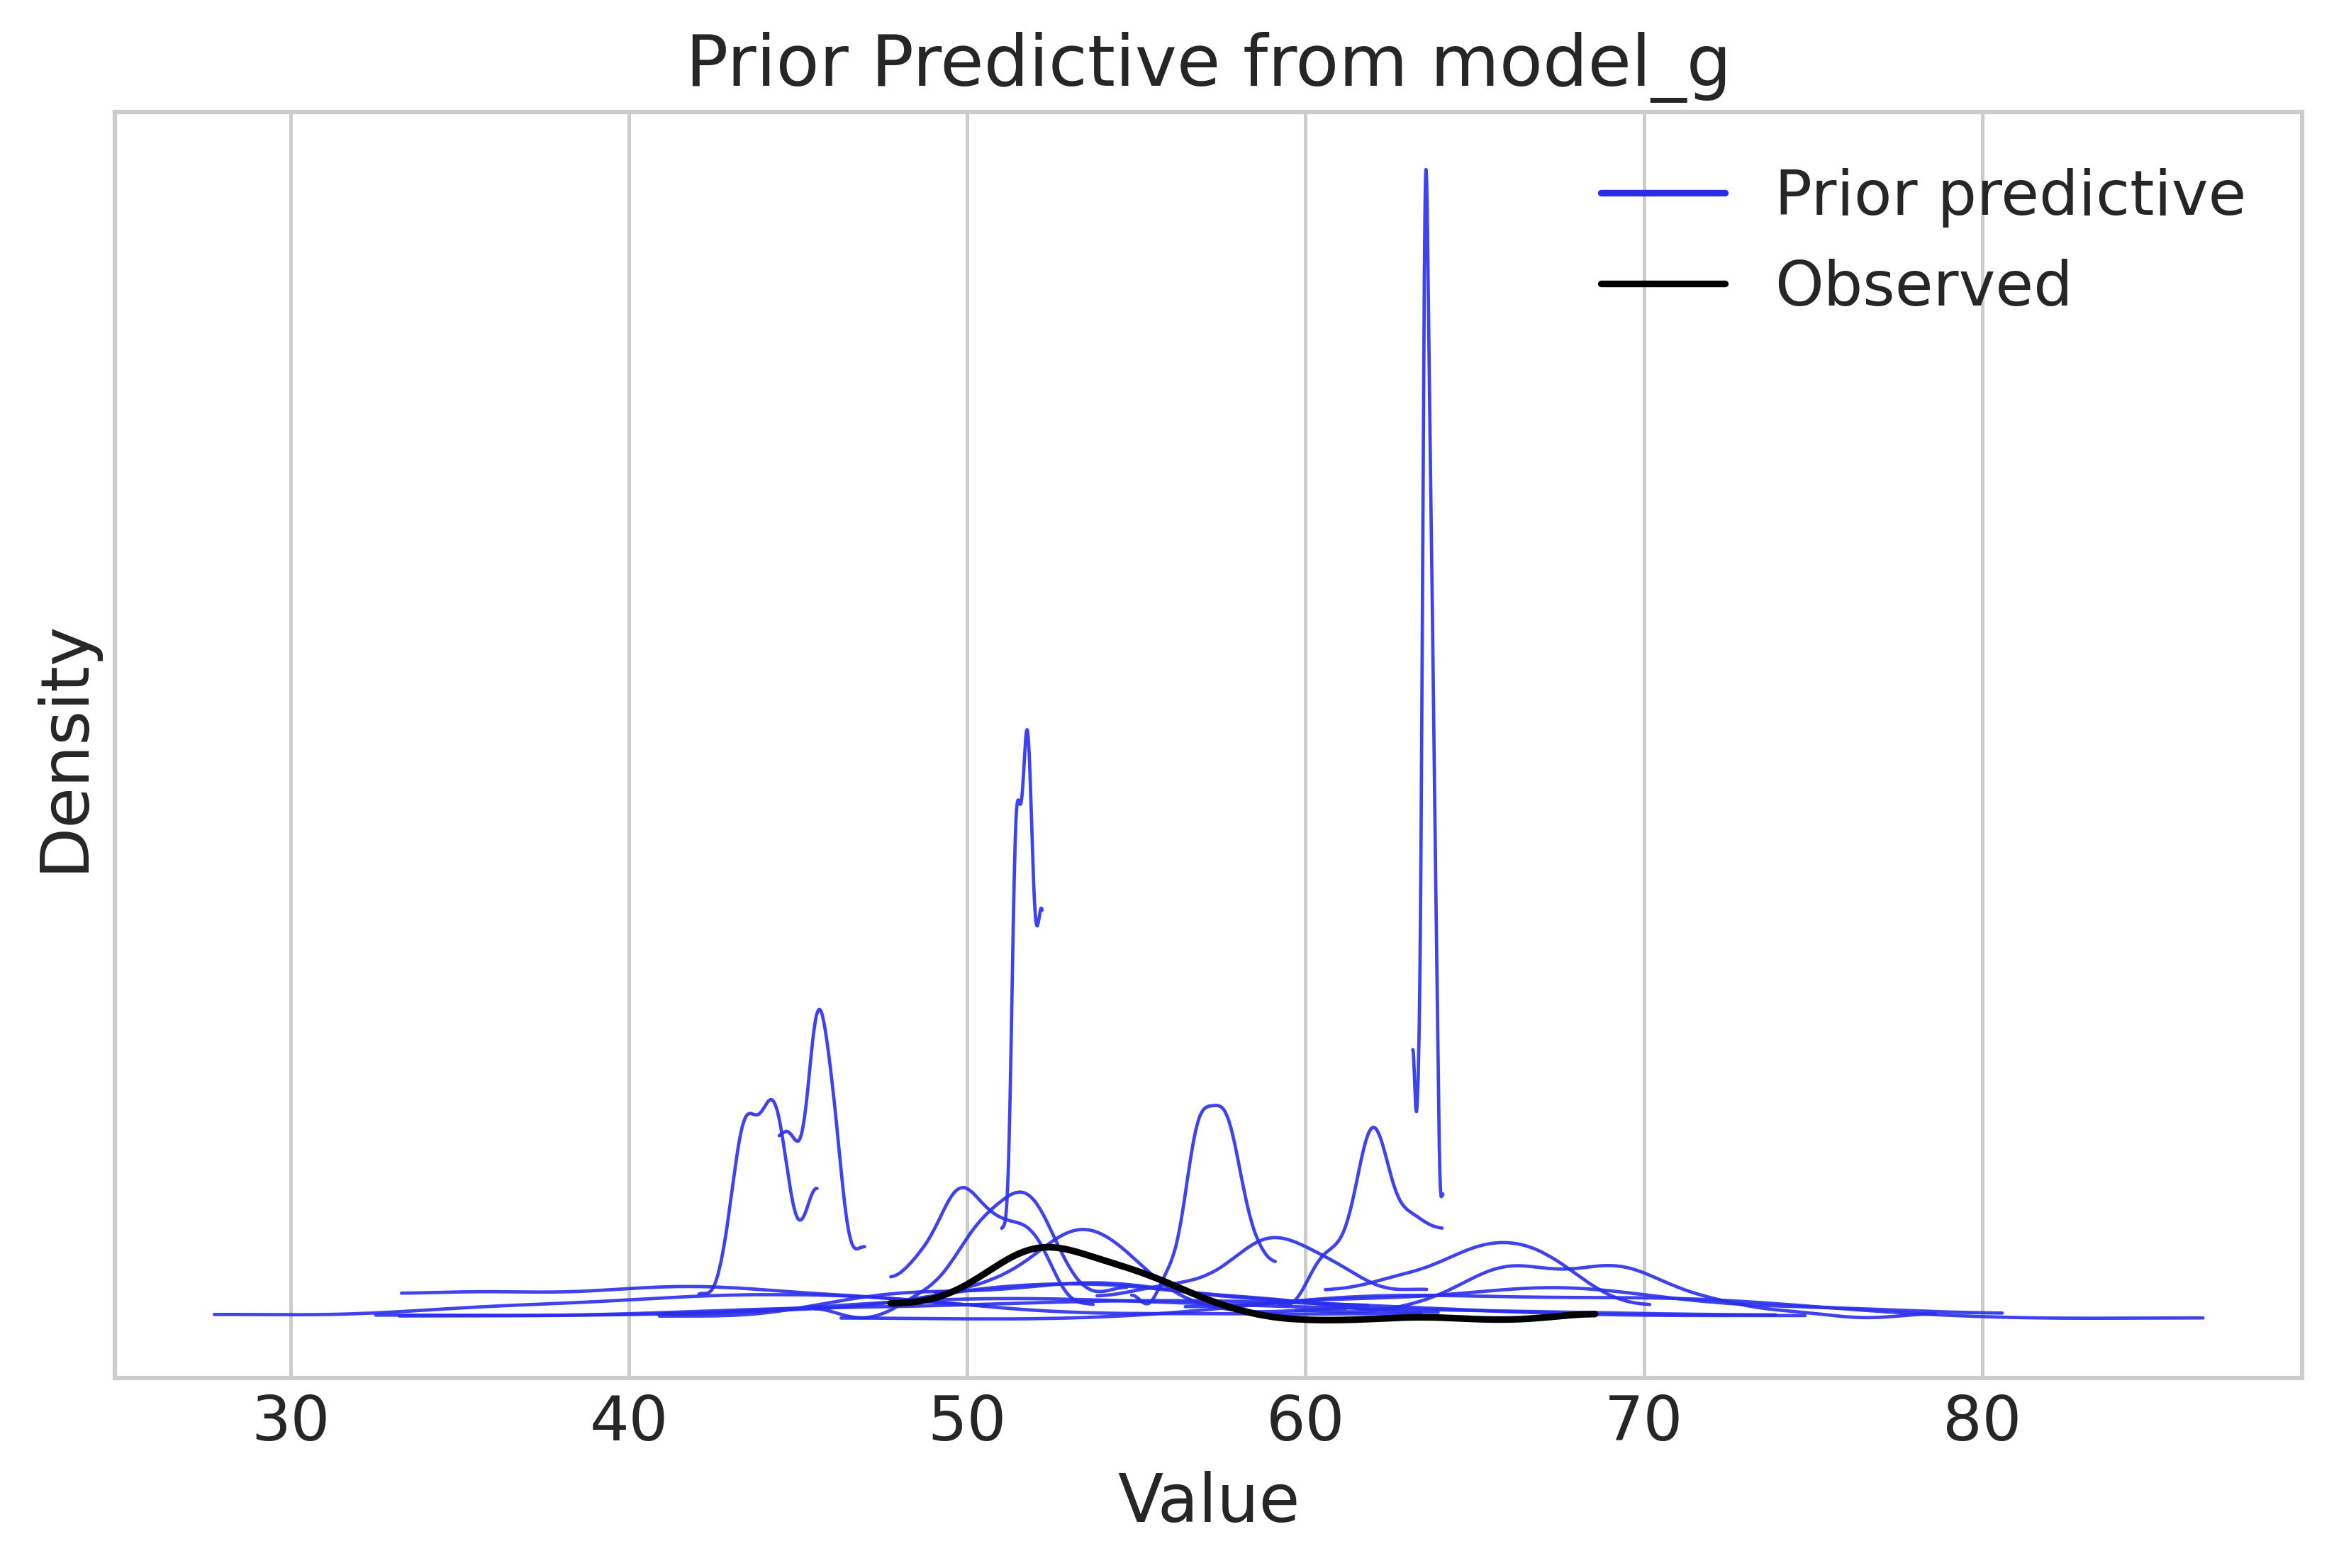

In [19]:
plt.figure(figsize=(10, 6))
ax = az.plot_ppc(idata_g, group='prior', num_pp_samples=20, mean=False, observed=True, random_seed=14)

for l in ax.get_lines()[2:]:
    l.set_alpha(0.9)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Prior Predictive from model_g')

plt.legend()
plt.show()